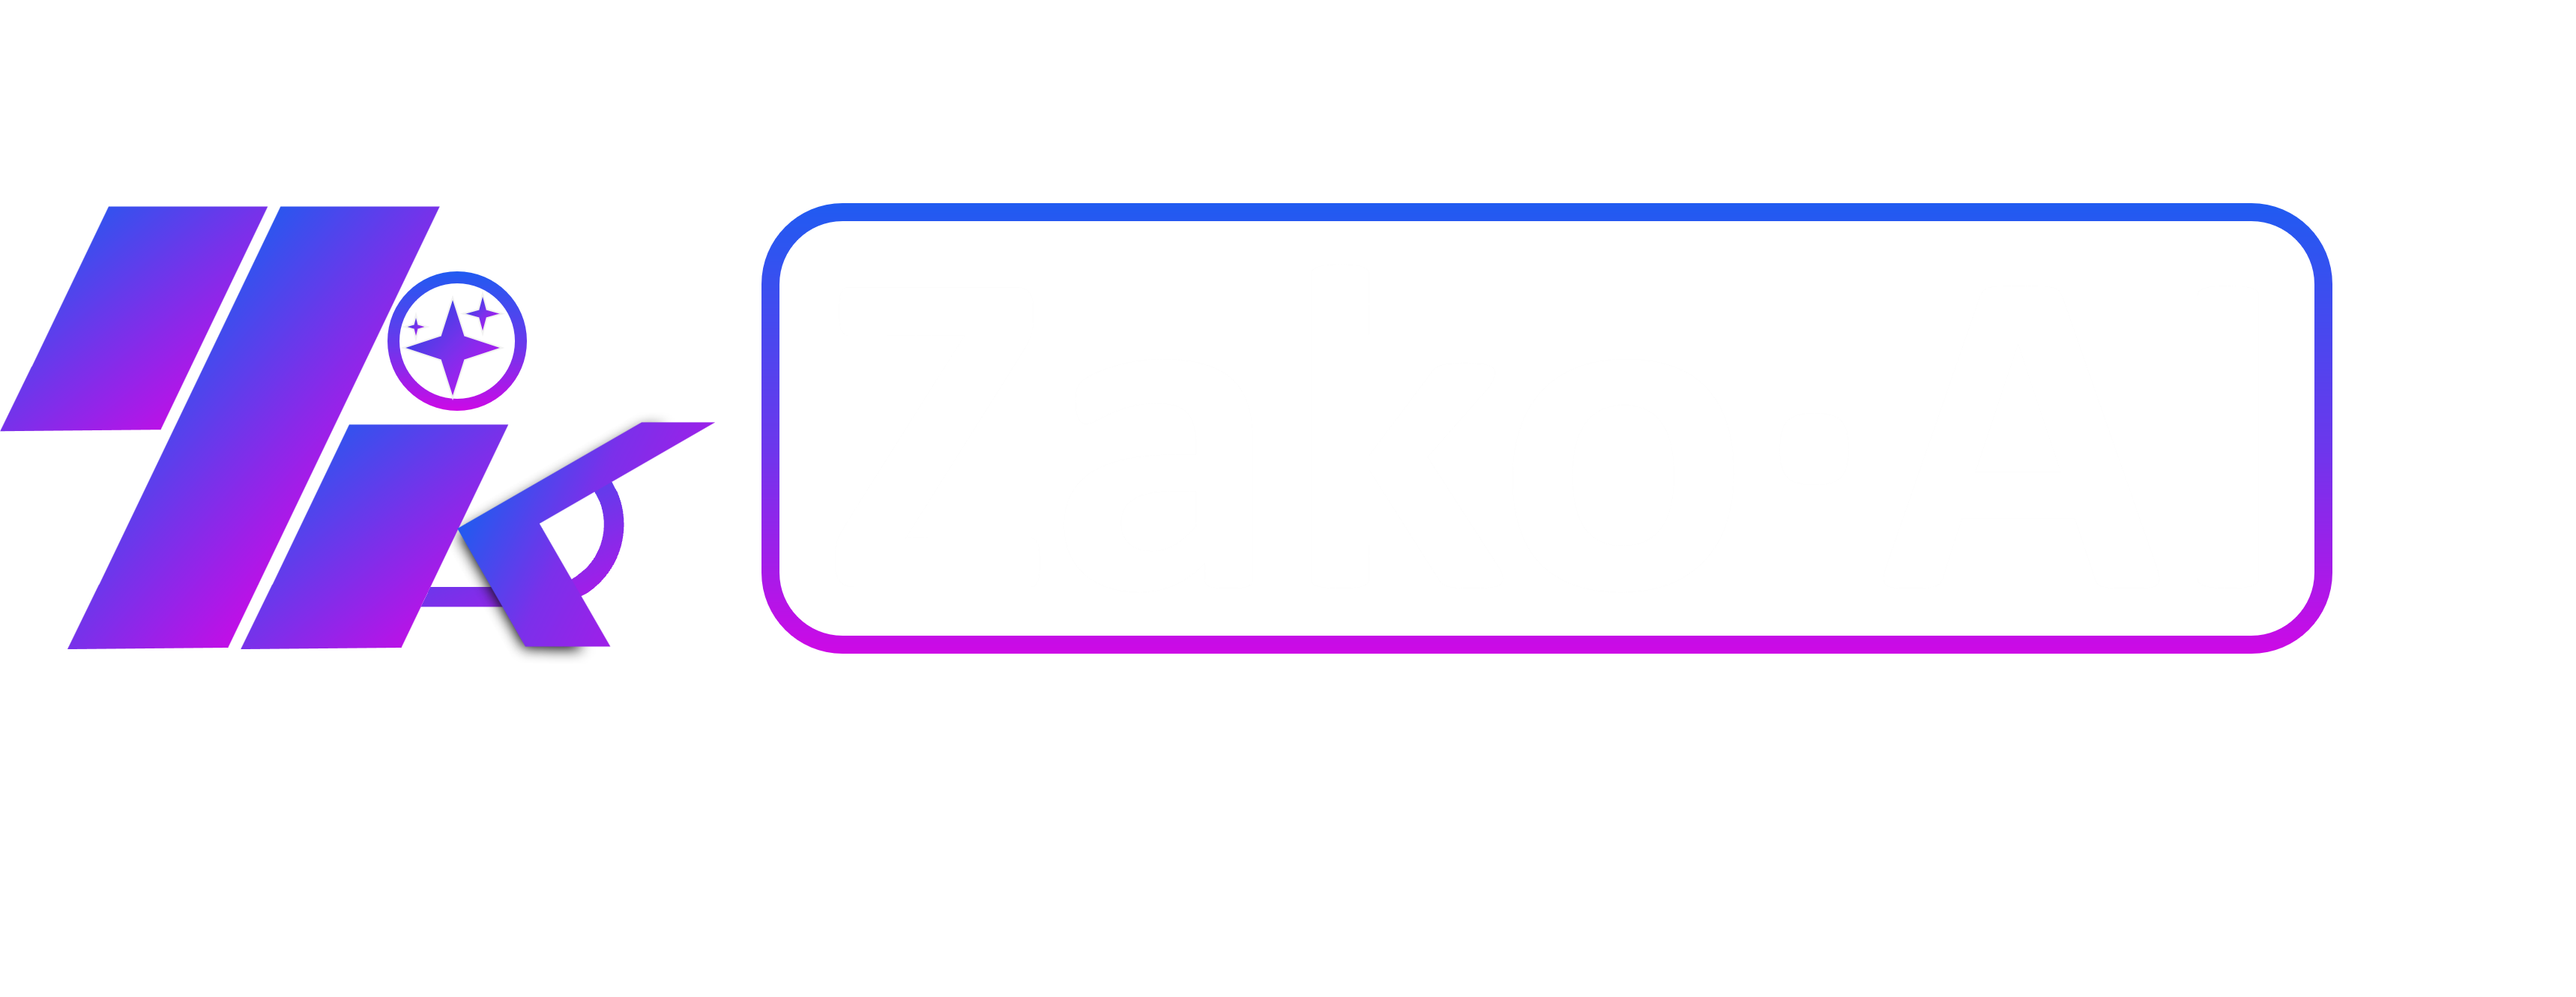

#DataAnalysis W1_2.
#Statistik tahlil (Univariate analysis)

### Topiklar: `Median, Mode, Cumilative Distribution Function (CDF), Inverse Cumilative Distribution Function, Quantil function, Qaurtiles, Interquartile Range (IQR), Outlier Detection, Probability Mass Function (PMF), Variance, Standard deviation`

## Datasetni yuklab olish

In [ ]:
# Kutubxonalarni chaqirib olish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Iris flower datasetini yuklash
iris = datasets.load_iris(as_frame=True)
df = iris.frame
df.sample(10) # ixtiyoriy 10 ta datasetni ko'rish

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
88,5.6,3.0,4.1,1.3,1
92,5.8,2.6,4.0,1.2,1
2,4.7,3.2,1.3,0.2,0
13,4.3,3.0,1.1,0.1,0
77,6.7,3.0,5.0,1.7,1
0,5.1,3.5,1.4,0.2,0
95,5.7,3.0,4.2,1.2,1
133,6.3,2.8,5.1,1.5,2
68,6.2,2.2,4.5,1.5,1
101,5.8,2.7,5.1,1.9,2


In [ ]:
# sepal length
data_list = df['sepal length (cm)'].values.tolist()
data_array = df['sepal length (cm)'].values
data_frame = df['sepal length (cm)']

# Sample mean
### Sample mean (o'rtacha qiymat): O'rtacha arifmetik qiymat bu statistik funksiya bo'lib, x(i) qiymatlarini o'rtachasi hisoblanadi;
Quyidagi formula yordamida hisoblab topiladi:
 \begin{align}
        μ = 1/n \sum_{i=1}^n x_i
    \end{align}

In [ ]:
# funksiya ko'rinishida

def calculate_mean(data_list):
  return sum(data_list)/len(data_list)

calculate_mean(data_list)

5.843333333333335

In [ ]:
# numpy
np.mean(data_array)

5.843333333333334

In [ ]:
# Sepal length uchun "mean" qiymatini pandas stillida
data_frame.mean()

5.843333333333334

## Median
 Median bu ma'lumotlarning markaziy qiymati hisoblanadi. Matematik ma'nosi, *X (x1, x2, x3, ....)* ma'lumotlarining yarmi *m* qiymatdan kichik qolgan yarmi esa katta.

Medianni hisoblash usuli quyidagicha: Avval ma'lumotlar qiymati bo'yicha tartiblanadi (sorting), so'ngra markazdagi qiymat aniqlanadi va o'sha aniqlangan qiymat median hisoblanadi. Markazdagi qiymatni topishda ma'lumotlarning soni hisobga olinishi shart: Agar *n* ta ma'lumotlar soni juft bo'ladigan bo'lsa unda ma'lumot markazi `n/2` va `n/2+1` (har ikkalasi ham median qiymatga erishtiradi, ularning o'rtachasini hisoblash mumkin) asosida tanlanadi. Toq bo'lsa, unda `(n+1)/2` ko'rinishida topiladi



$$ P(X \leq m) \geq \frac{1}{2} \quad \text{va} \quad P(X \geq m) \geq \frac{1}{2} $$


In [ ]:
# function
def calculate_median(data_list):
  sorted_list = sorted(data_list)
  n = len(sorted_list)

  # ma'lumotlar sonini juft yoki toq ekanligini aniqlaymiz
  center = (n+1)/2 # toq uchun
  if n % 2 == 0:
    center1, center2 = n/2, (n/2)+1
    return (sorted_list[int(center1)] + sorted_list[int(center2)])/2
  else:
    return sorted_list[int(center)]

calculate_median(data_list)

5.8

In [ ]:
# numpy da topish usuli
np.median(df['sepal length (cm)'])

5.8

In [ ]:
# Median
df['sepal length (cm)'].median()

5.8

## Cumilative Distribution Function (CDF)
### CDF (Yig'indili taqsimot funksiyasi) - bu ma'lumot qiymatlarini taqsimotini berilgan `x` qiymatidan kichik yoki teng (≤) ekanligini hisobga olib, ularning yig'indisini hisoblab beradi.
$$ \hat{F}(x) = \frac{1}{n} \sum_{i=1}^{n} I(x_i \leq x) $$

$$ I(x_i \leq x) = \begin{cases}
1 & \text{if } x_i \leq x \\
0 & \text{if } x_i > x
\end{cases} $$


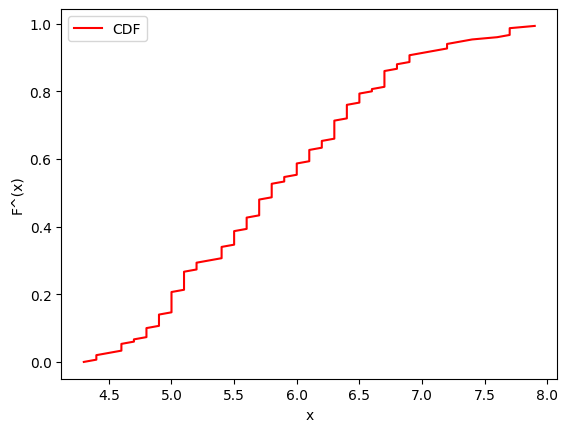

In [ ]:
# calculation
def calculate_cdf(data_list):
  sorted_data = sorted(data_list)
  return sorted_data, np.arange(0, 1, 1/len(sorted_data))

x, y = calculate_cdf(data_list)
plt.plot(x, y, label = 'CDF', color='red')
plt.xlabel('x')
plt.ylabel('F^(x)')
plt.legend()

## Teskari CDF
Teskari CDF - bu `kvantil` (quantile function) funksiya ham deb yuritiladi, berilgan qiymat ehtimolligi asosida mos qiymatni topish imkonini beruvchi funksiya;
$$ \hat{F}^{-1}(p) = x $$

Teskari CDF - bu kvantil funksiya bo'lganligi uchun, 4 tala kvartaylni ham topish mumkin.

IQR esa, quyidagi formula orqali aniqlanadi:
$$ \text{IQR} = Q_3 - Q_1 = \hat{F}^{-1}(0.75) - \hat{F}^{-1}(0.25) $$



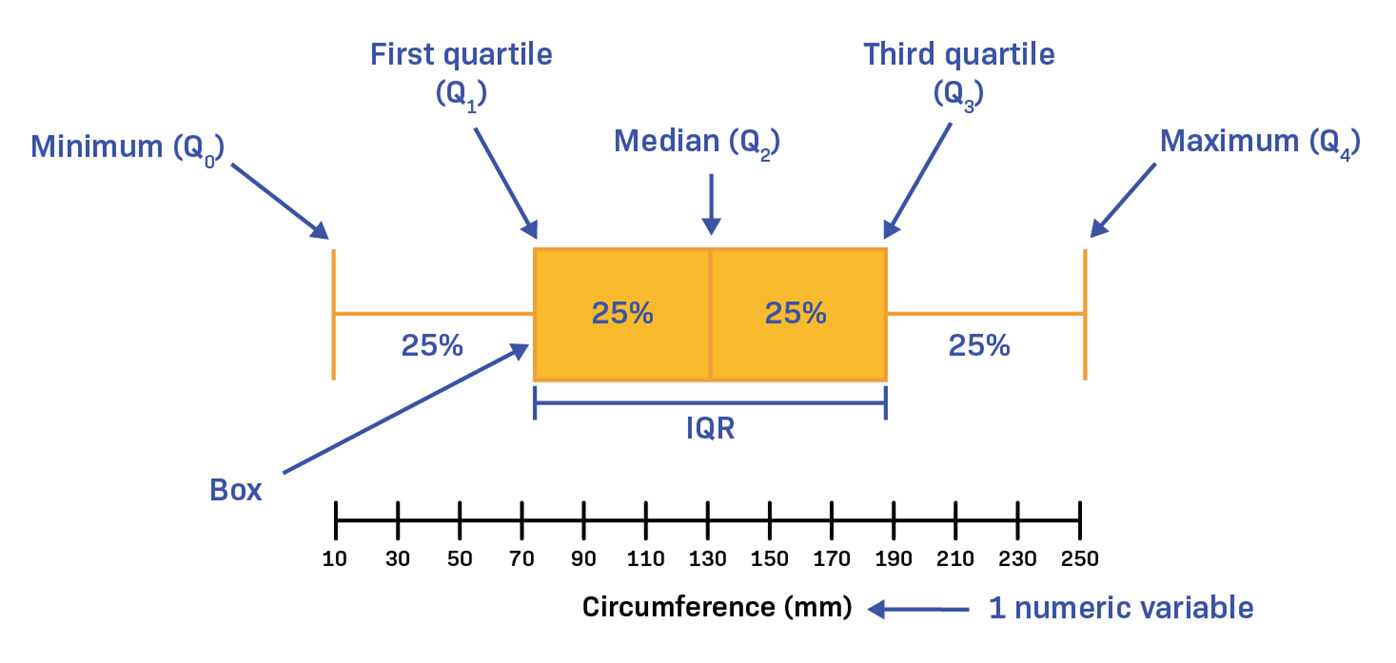

In [ ]:
# Inverse CDF
def quartiles(data_list):
  Q0 = data_list[0] # 0%
  Q1 = data_list[int(len(data_list)*0.25)] # 25%
  Q2 = data_list[int(len(data_list)*0.5)]  # 50%
  Q3 = data_list[int(len(data_list)*0.75)] # 75%
  Q4 = data_list[int(len(data_list)*1.0)-1]  # 100%
  return Q0, Q1, Q2, Q3, Q4

Q = quartiles(x)
Q

(4.3, 5.1, 5.8, 6.4, 7.9)

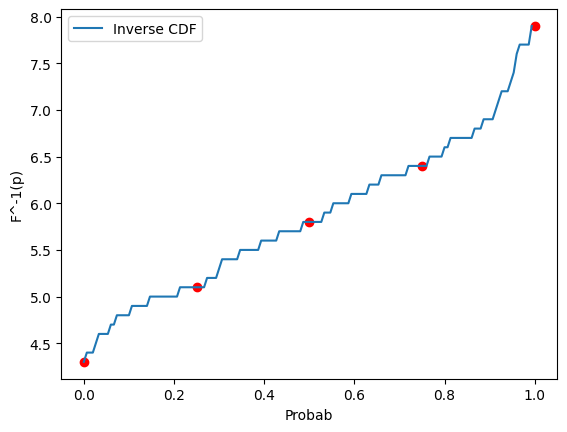

In [ ]:
# inverse CDF
plt.plot(y, x, label='Inverse CDF')
plt.scatter([0, 0.25, 0.5, 0.75, 1], Q, color='r') # 0.5

# plot.plot()
plt.xlabel('Probab')
plt.ylabel('F^-1(p)')
plt.legend()

In [ ]:
# IQR
IQR = Q[3]-Q[1]
IQR

1.3000000000000007

# Outlier detection

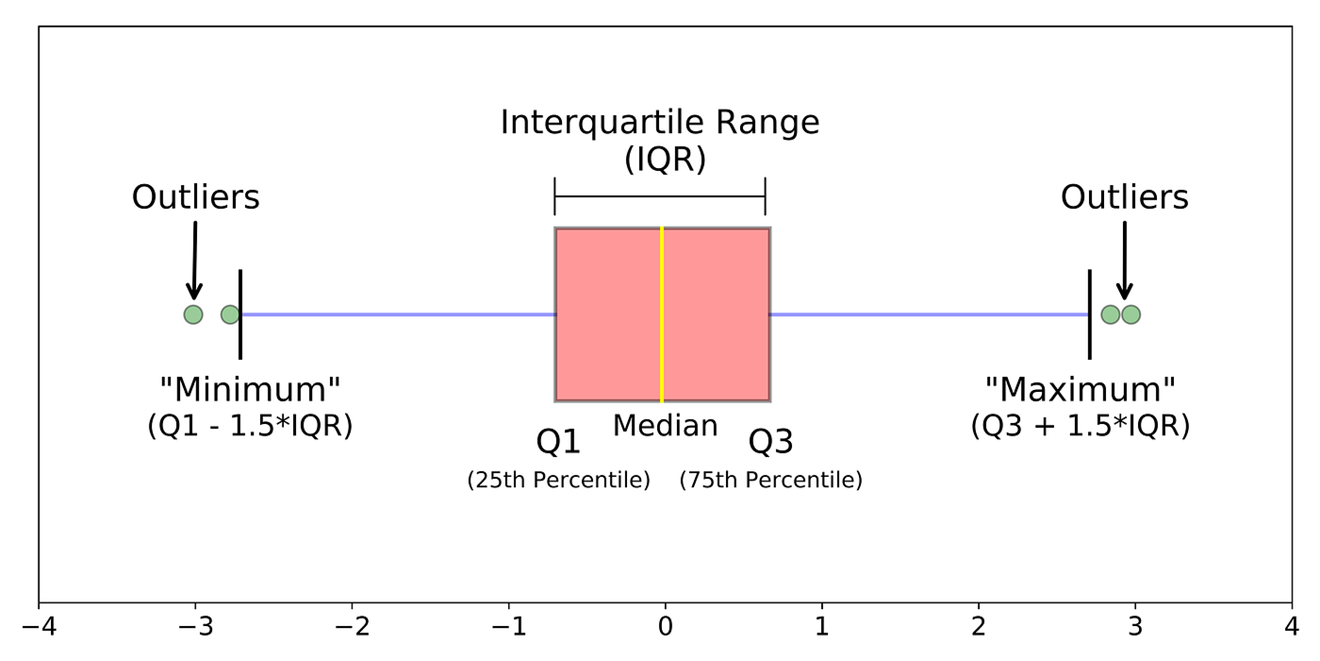

In [ ]:
# Outlier detection
less_min = df[df['sepal length (cm)'] < Q[1]-1.5*IQR]  #less than min
more_max = df[df['sepal length (cm)'] > Q[3]+1.5*IQR]  # more than max
print(less_min.size)
print(more_max.size)

0
0


#Probability Mass Function (PMF)
PMF (Ma'lumotlar ehtimolligi taqsimot funksiyasi)- bu funksiya, ma'lumotlarni qay darajada tarqoq va tarqoqlik qanday miqdorda ekanligini o'lchovchi funksiya;
$$ \hat{f}(x) = P(X = x) = \frac{1}{n} \sum_{i=1}^{n} I(x_i = x) $$


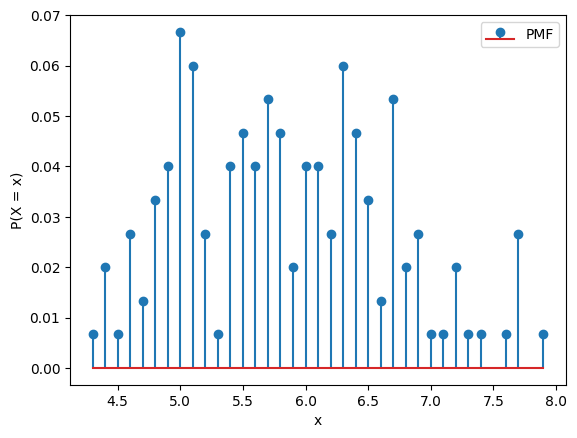

In [ ]:
# PMF
def calculate_pmf(data_list):
    unique_values, counts = np.unique(data_list, return_counts=True)
    pmf = counts / len(data_list)
    return unique_values, pmf

# Example usage (assuming 'df' is your DataFrame)
unique_x, pmf_y = calculate_pmf(df['sepal length (cm)'])

# Plotting the PMF
plt.stem(unique_x, pmf_y, label='PMF')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.legend()

#  Mode
Mode - PMF yoki PDFning eng maksimum qiymatga erishish nuqtasi;

$$ \text{mode}(X) = \arg\max_x \hat{f}(x) $$




In [ ]:
# mode
mode_idx = np.argmax(pmf_y)
unique_x[mode_idx]

5.0

# Variance
Variance (Dispersiya/Tarqoqlik) - bu ma'lumotlarni qay darajada ma'lumot o'rtacha qiymatidan uzoqlashishini belgilovchi qiymat. Qiymat qanchalik katta bo'lsa, ma'lumot qiymati shunchalik o'rtacha qiymatdan uzoqlashmoqda degani.
$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2 $$


In [ ]:
# Variance
def variance(array):
  # mean
  mean = np.mean(array)
  #farqlar kvadrati
  sq_diff = (array - mean)**2

  #variance
  return np.sum(sq_diff)/len(array)

variance = variance(df['sepal length (cm)'].values)
variance

0.6811222222222223

# Standard deviation (SD)

SD (standart og'ish) - bu variance qiymatining kvadrat ildiziga teng qiymat.

$$ \hat{\sigma} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2 } $$


In [ ]:
# sd
sd = np.sqrt(variance)
sd

0.8253012917851409